<a href="https://colab.research.google.com/github/Shakibap/Data-Science-Portfo/blob/Data_Science/Clustering_maktabkhooneh_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score

In [ ]:
#from google.colab import files
#files.upload()

Saving 1632560262896716.csv to 1632560262896716.csv


{'1632560262896716.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\r\n1,Male,19,15,39\r\n2,Male,21,15,81\r\n3,Female,20,16,6\r\n4,Female,23,16,77\r\n5,Female,31,17,40\r\n6,Female,22,17,76\r\n7,Female,35,18,6\r\n8,Female,23,18,94\r\n9,Male,64,19,3\r\n10,Female,30,19,72\r\n11,Male,67,19,14\r\n12,Female,35,19,99\r\n13,Female,58,20,15\r\n14,Female,24,20,77\r\n15,Male,37,20,13\r\n16,Male,22,20,79\r\n17,Female,35,21,35\r\n18,Male,20,21,66\r\n19,Male,52,23,29\r\n20,Female,35,23,98\r\n21,Male,35,24,35\r\n22,Male,25,24,73\r\n23,Female,46,25,5\r\n24,Male,31,25,73\r\n25,Female,54,28,14\r\n26,Male,29,28,82\r\n27,Female,45,28,32\r\n28,Male,35,28,61\r\n29,Female,40,29,31\r\n30,Female,23,29,87\r\n31,Male,60,30,4\r\n32,Female,21,30,73\r\n33,Male,53,33,4\r\n34,Male,18,33,92\r\n35,Female,49,33,14\r\n36,Female,21,33,81\r\n37,Female,42,34,17\r\n38,Female,30,34,73\r\n39,Female,36,37,26\r\n40,Female,20,37,75\r\n41,Female,65,38,35\r\n42,Male,24,38,92\r\n43,Male,48,39,36\r\n44,Female,3

In [ ]:
data_full = pd.read_csv('1632560262896716.csv')

In [ ]:
data_full.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data_full.shape

(200, 5)

In [ ]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data_full.isnull().sum().sum()

0

In [ ]:
df = data_full.copy()

In [ ]:
df.rename(columns={"Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"}, inplace=True)

In [ ]:
df.set_index('CustomerID', inplace=True)

In [ ]:
encoder = LabelEncoder()
df.Gender = encoder.fit_transform(data_full.Gender)


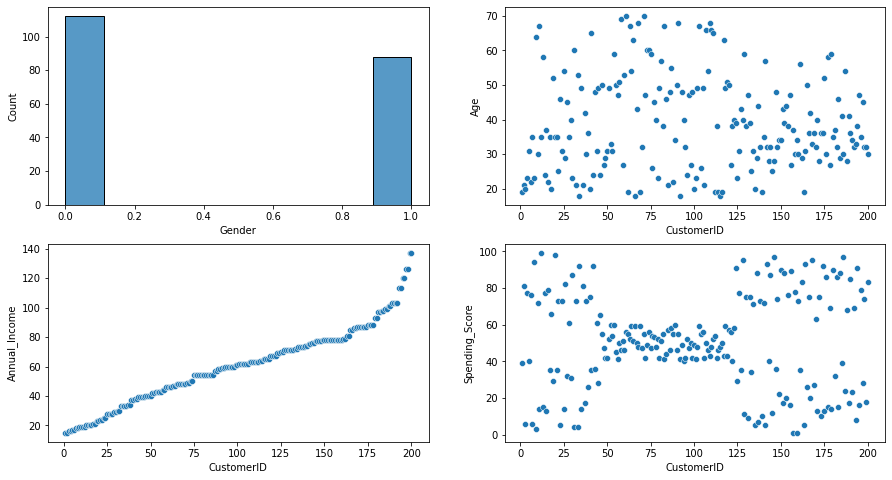

In [ ]:
f, axes = plt.subplots(2, 2, figsize=(15, 8))
sns.histplot(data=df.Gender, ax=axes[0,0])
sns.scatterplot(x=df.index, y=df.Age, ax=axes[0,1])
sns.scatterplot(x=df.index, y=df.Annual_Income, ax=axes[1,0])
sns.scatterplot(x=df.index, y=df.Spending_Score, ax=axes[1,1])

In [ ]:
# Normalizing the data
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=['Gender', 'Age', 'Annual_Income', 'Spending_Score'])

In [ ]:
df_scaled.head()

,Gender,Age,Annual_Income,Spending_Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


#KMeans

##Elbow Method

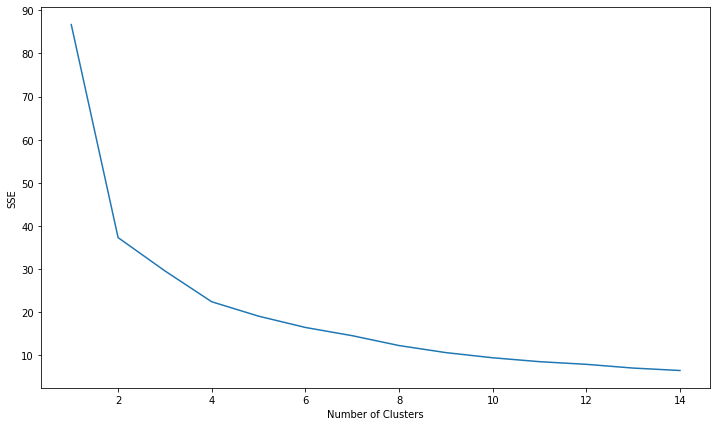

In [ ]:
# finding the optimum value of cluster based on square errors
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(df_scaled)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(12, 7))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Based on this method 4 is the optimum value

**4 clusters**

In [ ]:
kmeans_4clusters = KMeans(n_clusters=4, max_iter=1000).fit(df_scaled)

In [ ]:
df["KMeans_4Clusters"] = kmeans_4clusters.labels_

In [ ]:
df.groupby('KMeans_4Clusters').Gender.mean(), df.groupby('KMeans_4Clusters').Age.mean(), df.groupby('KMeans_4Clusters').Annual_Income.mean(), df.groupby('KMeans_4Clusters').Spending_Score.mean()

(KMeans_4Clusters
 0    1.0
 1    0.0
 2    1.0
 3    0.0
 Name: Gender, dtype: float64, KMeans_4Clusters
 0    28.250000
 1    48.109091
 2    49.437500
 3    28.438596
 Name: Age, dtype: float64, KMeans_4Clusters
 0    62.000000
 1    58.818182
 2    62.416667
 3    59.666667
 Name: Annual_Income, dtype: float64, KMeans_4Clusters
 0    71.675000
 1    34.781818
 2    29.208333
 3    67.684211
 Name: Spending_Score, dtype: float64)

The clusters are 
1. women with the average age of 28 and the average annual_income of 58 and the average spending_score of 67
2. women with the average age of 49 and the average annual_income of 62 and the average spending_score of about 29
3. men with the average age of 28  and the average annual_income of 62 and the average spending_score of about 71
4. men with the average age of 48 and the average annual_income of 59 and the average spending_score of about 34

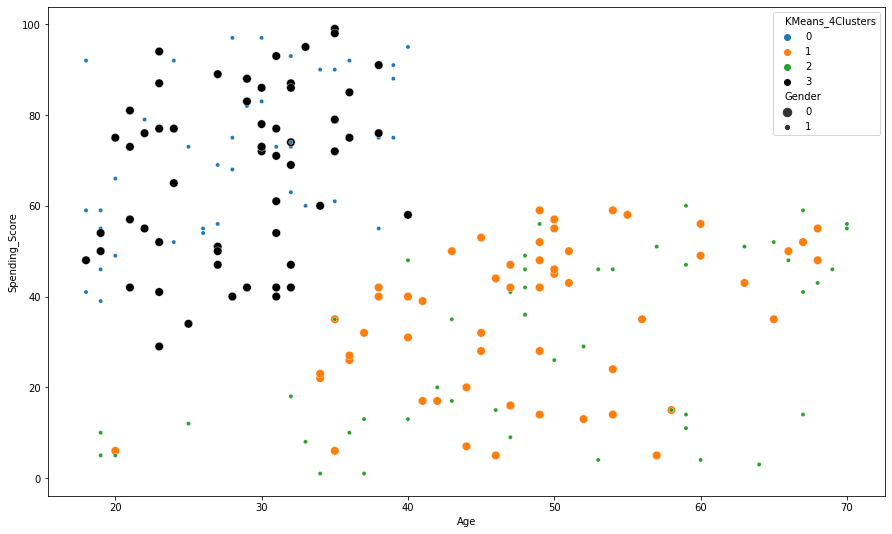

In [ ]:
plt.figure(figsize=(15, 9))
sns.scatterplot(x=df.Age, y=df.Spending_Score, hue=df.KMeans_4Clusters, palette=["C0", "C1", "C2", "k"], size=df.Gender)

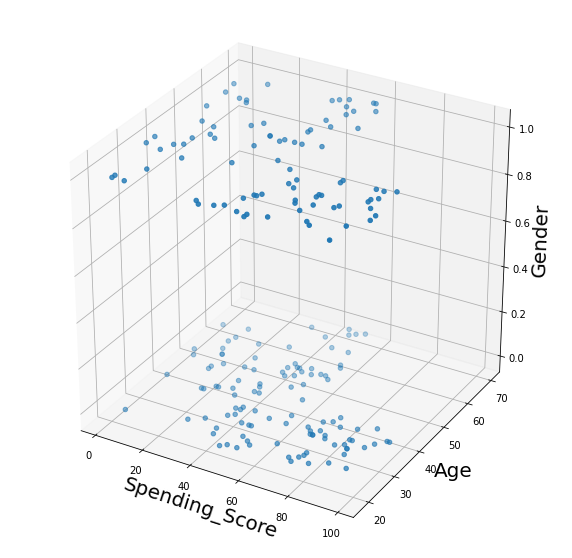

In [ ]:
fig = plt.figure(figsize=(10,10))
 
ax = plt.axes(projection ='3d')
 
y = df.Age
x = df.Spending_Score
z = df.Gender

ax.scatter(x, y, z)
plt.ylabel("Age", fontsize=20)
plt.xlabel("Spending_Score", fontsize=20)
ax.set_zlabel('Gender', fontsize=20, rotation = 0)
plt.show()

##Silhouette_Score

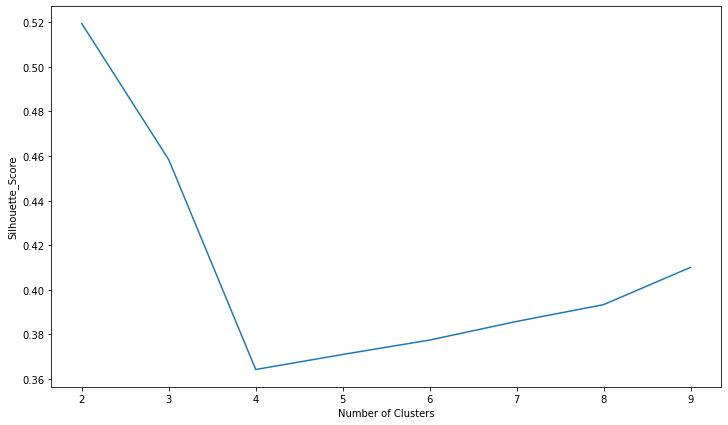

In [ ]:
score = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)
    score[k] = silhouette_score(df_scaled, kmeans.labels_)
plt.figure(figsize=(12, 7))
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Score")
plt.show()

In [ ]:
max(score, key=score.get)

2

The result of this method is completely different with the Elbow method

just 2 cluster is based on gender and this is too general

The score of 3 and 5 are more than 4



##Trial and Error

**3 clusters**

In [ ]:
kmeans_3clusters = KMeans(n_clusters=3, max_iter=1000).fit(df_scaled)

In [ ]:
df["KMeans_3Clusters"] = kmeans_3clusters.labels_

In [ ]:
df.groupby('KMeans_3Clusters').Gender.mean(), df.groupby('KMeans_3Clusters').Age.mean(), df.groupby('KMeans_3Clusters').Annual_Income.mean(), df.groupby('KMeans_3Clusters').Spending_Score.mean()

(KMeans_3Clusters
 0    0.0
 1    1.0
 2    1.0
 Name: Gender, dtype: float64, KMeans_3Clusters
 0    38.098214
 1    28.250000
 2    49.437500
 Name: Age, dtype: float64, KMeans_3Clusters
 0    59.250000
 1    62.000000
 2    62.416667
 Name: Annual_Income, dtype: float64, KMeans_3Clusters
 0    51.526786
 1    71.675000
 2    29.208333
 Name: Spending_Score, dtype: float64)

The clusters are

1. women with the average age of 38 and the average annual_income of 59 and the average spending_score of 51
2. men with the average age of 28 and the average annual_income of 62 and the average spending_score of about 71
3. men with the average age of 49 and the average annual_income of 62 and the average spending_score of about 29


It still seems general


**5 clusters**

In [ ]:
kmeans_5clusters = KMeans(n_clusters=5, max_iter=1000).fit(df_scaled)
df["KMeans_5Clusters"] = kmeans_5clusters.labels_

In [ ]:
df.groupby('KMeans_5Clusters').Gender.mean(), df.groupby('KMeans_5Clusters').Age.mean(), df.groupby('KMeans_5Clusters').Annual_Income.mean(), df.groupby('KMeans_5Clusters').Spending_Score.mean()

(KMeans_5Clusters
 0    1.0
 1    0.0
 2    1.0
 3    1.0
 4    0.0
 Name: Gender, dtype: float64, KMeans_5Clusters
 0    34.562500
 1    48.109091
 2    28.690476
 3    58.166667
 4    28.438596
 Name: Age, dtype: float64, KMeans_5Clusters
 0    81.812500
 1    58.818182
 2    60.904762
 3    53.633333
 4    59.666667
 Name: Annual_Income, dtype: float64, KMeans_5Clusters
 0    12.000000
 1    34.781818
 2    70.238095
 3    37.566667
 4    67.684211
 Name: Spending_Score, dtype: float64)

The clusters are:
1. women with the average age of 28 and annual_income of 59 and the average spending_score of 67 
2. women with the average age of 48 and annual_income of 58 and the average spending_score of 34
3. men with the average age of 28 and annual_income of 60 and the average spending_score of about 70
4. men with the average age of 35 and annual_income of 82 and the average spending_score of about 12
5. men with the average age of 58 and annual_income of 52  and the average spending_score of about 37


It makes sense! The clusters are more detailed

##Agglomerative

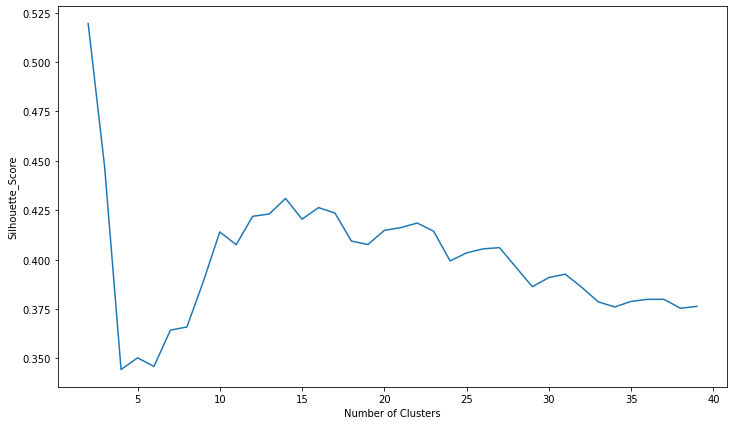

In [ ]:
# finding the Silhouette score based on different number of clusters
score = {}
for k in range(2, 40):
    agglom = AgglomerativeClustering(n_clusters=k).fit(df_scaled)
    score[k] = silhouette_score(df_scaled, agglom.labels_)
plt.figure(figsize=(12, 7))
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette_Score")
plt.show()

In [ ]:
max(score, key=score.get)

2

This clustering is just based on Gender and is too general

##Trial and Error

**3 clusters**

In [ ]:
agglom_3clusters = AgglomerativeClustering(n_clusters=3).fit(df_scaled)
df['Agglom_3Clusters'] = agglom_3clusters.labels_

In [ ]:
df.groupby('Agglom_3Clusters').Gender.mean(), df.groupby('Agglom_3Clusters').Age.mean(), df.groupby('Agglom_3Clusters').Annual_Income.mean(), df.groupby('Agglom_3Clusters').Spending_Score.mean()

(Agglom_3Clusters
 0    0.0
 1    1.0
 2    1.0
 Name: Gender, dtype: float64, Agglom_3Clusters
 0    38.098214
 1    48.038462
 2    27.916667
 Name: Age, dtype: float64, Agglom_3Clusters
 0    59.250000
 1    60.288462
 2    65.027778
 Name: Annual_Income, dtype: float64, Agglom_3Clusters
 0    51.526786
 1    31.096154
 2    73.666667
 Name: Spending_Score, dtype: float64)

The clusters are:

women with the average age of 38 and the average annual_income of 59 and the average spending_score of 51

men with the average age of 27 and the average annual_income of 65 and the average spending_score of about 73

men with the average age of 48 and the average annual_income of 60 and the average spending_score of about 31

These clustering is too much close to the KMeans

**4 clusters**

In [ ]:
agglom_4clusters = AgglomerativeClustering(n_clusters=4).fit(df_scaled)
df['Agglom_4Clusters'] = agglom_4clusters.labels_

In [ ]:
df.groupby('Agglom_4Clusters').Gender.mean(), df.groupby('Agglom_4Clusters').Age.mean(), df.groupby('Agglom_4Clusters').Annual_Income.mean(), df.groupby('Agglom_4Clusters').Spending_Score.mean()

(Agglom_4Clusters
 0    1.0
 1    0.0
 2    1.0
 3    0.0
 Name: Gender, dtype: float64, Agglom_4Clusters
 0    48.038462
 1    28.915254
 2    27.916667
 3    48.320755
 Name: Age, dtype: float64, Agglom_4Clusters
 0    60.288462
 1    60.593220
 2    65.027778
 3    57.754717
 Name: Annual_Income, dtype: float64, Agglom_4Clusters
 0    31.096154
 1    66.779661
 2    73.666667
 3    34.547170
 Name: Spending_Score, dtype: float64)

The clusters are:
1. women with the average age of 28 and the average annual_income of 60 and the average spending_score of 66
2. women with the average age of 48 and the average annual_income of 57 and the average spending_score of about 34
3. men with the average age of 27  and the average annual_income of 65 and the average spending_score of about 73
4. men with the average age of 48 and the average annual_income of 60 and the average spending_score of about 31

This clustering is close to kmeans

**5 clusters**

In [ ]:
agglom_5clusters = AgglomerativeClustering(n_clusters=5).fit(df_scaled)
df['Agglom_5Clusters'] = agglom_5clusters.labels_

In [ ]:
df.groupby('Agglom_5Clusters').Gender.mean(), df.groupby('Agglom_5Clusters').Age.mean(), df.groupby('Agglom_5Clusters').Annual_Income.mean(), df.groupby('Agglom_5Clusters').Spending_Score.mean()

(Agglom_5Clusters
 0    0.0
 1    0.0
 2    1.0
 3    1.0
 4    1.0
 Name: Gender, dtype: float64, Agglom_5Clusters
 0    28.915254
 1    48.320755
 2    27.916667
 3    52.911765
 4    38.833333
 Name: Age, dtype: float64, Agglom_5Clusters
 0    60.593220
 1    57.754717
 2    65.027778
 3    46.470588
 4    86.388889
 Name: Annual_Income, dtype: float64, Agglom_5Clusters
 0    66.779661
 1    34.547170
 2    73.666667
 3    41.382353
 4    11.666667
 Name: Spending_Score, dtype: float64)

The clusters are:

1. women with the average age of 28 and annual_income of 60 and the average spending_score of 66
2. women with the average age of 48 and annual_income of 57 and the average spending_score of 34
3. men with the average age of 27 and annual_income of 65 and the average spending_score of about 70
4. men with the average age of 38 and annual_income of 86 and the average spending_score of about 11
5. men with the average age of 52 and annual_income of 46 and the average spending_score of about 41

more detailed

#DBSCAN

In [ ]:
#finding the maximum value of epsilon
dist = euclidean_distances(df_scaled, df_scaled)

In [ ]:
dist.max()

1.6404631440858835

eps <= 1.64

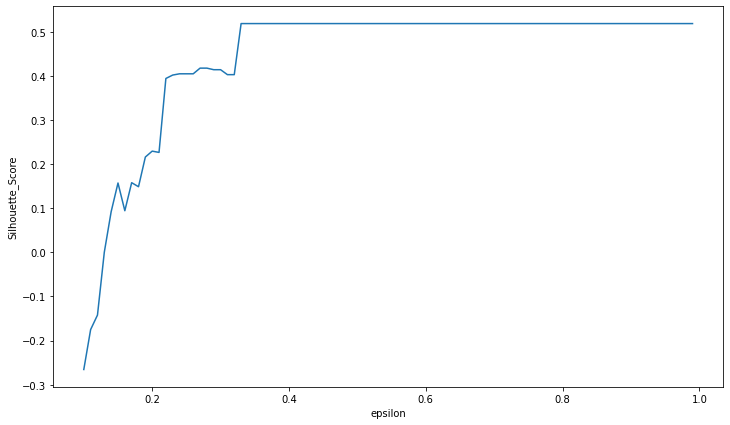

In [ ]:
# finding the optimum value of epsilon
score = {}
for e in [x/100 for x in range(10,100)]:
    DB = DBSCAN(eps=e).fit(df_scaled)
    score[e] = silhouette_score(df_scaled, DB.labels_)
plt.figure(figsize=(12, 7))
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("epsilon")
plt.ylabel("Silhouette_Score")
plt.show()

In [ ]:
max(score, key=score.get)

0.33

In [ ]:
eps = 0.33

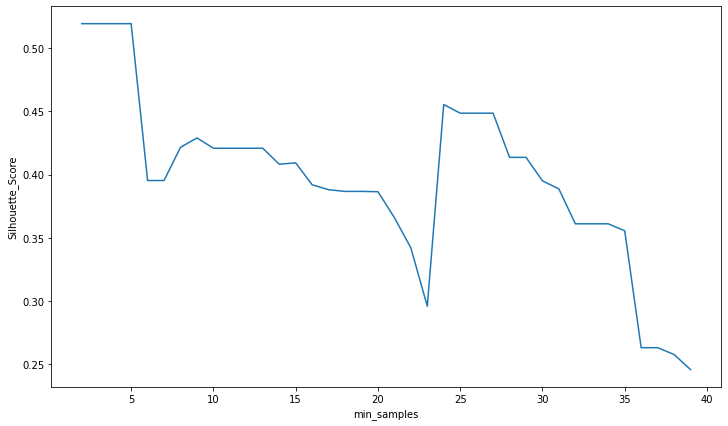

In [ ]:
# finding the optimum value of min_samples
score = {}
for s in range(2,40):
    DB = DBSCAN(eps=0.33, min_samples=s).fit(df_scaled)
    score[s] = silhouette_score(df_scaled, DB.labels_)
plt.figure(figsize=(12, 7))
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("min_samples")
plt.ylabel("Silhouette_Score")
plt.show()

In [ ]:
max(score, key=score.get)

2

In [ ]:
DB_2minSamples = DBSCAN(eps=0.33, min_samples=2).fit(df_scaled)

In [ ]:
NumCluster = len(set(DB_2minSamples.labels_)) - (1 if -1 in set(DB_2minSamples.labels_) else 0)

In [ ]:
NumCluster

2

just 2 clusters is too general

##Trial and Error

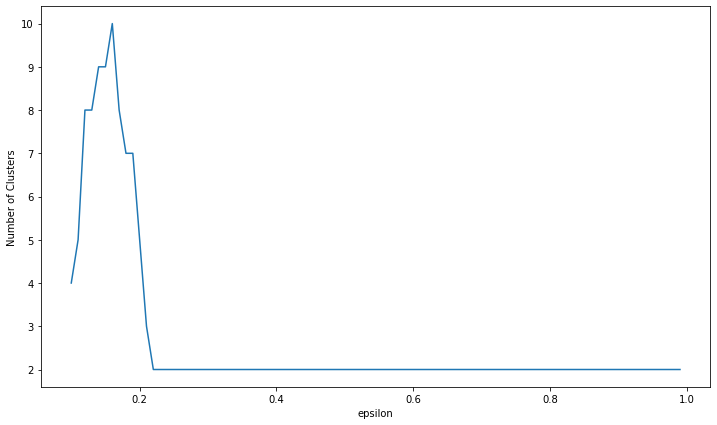

In [ ]:
# finding the number of clusters based on differen epsilon values
score = {}
for e in [x/100 for x in range(10,100)]:
    DB = DBSCAN(eps=e, min_samples=5).fit(df_scaled)
    score[e] = len(set(DB.labels_)) - (1 if -1 in set(DB.labels_) else 0)
plt.figure(figsize=(12, 7))
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("epsilon")
plt.ylabel("Number of Clusters")
plt.show()

In [ ]:
DB = DBSCAN(eps=0.1, min_samples=5).fit(df_scaled)

In [ ]:
NumClusters = len(set(DB.labels_)) - (1 if -1 in set(DB.labels_) else 0)
NumClusters

4

In [ ]:
DB.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1,  0, -1, -1, -1,  1,  0, -1, -1,  0, -1, -1, -1,  0,  2,
       -1, -1,  2, -1,  0, -1, -1, -1, -1, -1,  1,  0, -1, -1,  1, -1,  0,
       -1,  1, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1,  2,  2, -1, -1,  0,
       -1,  1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,  3, -1,  3,
       -1, -1, -1,  3, -1, -1, -1,  3, -1, -1, -1,  3, -1, -1, -1, -1, -1,
        3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1,  3, -1, -1,
       -1, -1, -1, -1, -1,  3, -1, -1, -1, -1, -1,  3, -1,  3, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

Too many outliers! not reasonable

In [ ]:
DB = DBSCAN(eps=0.2, min_samples=5).fit(df_scaled)

In [ ]:
NumCluster = len(set(DB.labels_)) - (1 if -1 in set(DB.labels_) else 0)
NumCluster

5

In [ ]:
DB.labels_

array([-1,  0, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1, -1,  0,  1,
        0,  2, -1, -1,  0,  1,  0,  1,  0,  1,  0,  1,  1, -1,  1, -1,  0,
        1,  1,  1,  1,  1,  1,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  2,  1,  2,  1,  2,  1,  2,  2,  0,  1,  1,  2,  0,  1,  1,
        0,  1,  2,  1,  1,  1,  2,  0,  1,  2,  1,  1,  2,  0,  2,  1,  1,
        2,  1,  1,  1,  1,  1,  0,  2,  1,  1,  0,  1,  1,  2,  0,  1,  1,
        2,  0,  2,  1,  1,  2,  2,  2,  2,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  1,  3,  1,  1,  2,  3, -1,  3,  2,  3,  1,  1, -1,  1,
        4,  3, -1,  1,  4,  3,  1,  1, -1,  3,  2,  1,  4,  3,  2,  3,  4,
        1,  4,  1,  2,  1,  2,  1,  1,  1, -1,  1,  2,  1,  2,  1,  4,  3,
        2,  3,  2,  3,  4,  1,  2,  3, -1,  3,  4,  1,  2,  1,  4,  3,  4,
        3,  4,  1,  4,  1, -1,  1,  4,  1, -1, -1, -1, -1])

In [ ]:
DB_5Clusters = DBSCAN(eps=0.2, min_samples=5).fit(df_scaled)
df['DB_5Clusters'] = DB_5Clusters.labels_

In [ ]:
df.groupby('DB_5Clusters').Gender.mean(), df.groupby('DB_5Clusters').Age.mean(), df.groupby('DB_5Clusters').Annual_Income.mean(), df.groupby('DB_5Clusters').Spending_Score.mean()

(DB_5Clusters
 -1    0.772727
  0    1.000000
  1    0.000000
  2    1.000000
  3    1.000000
  4    0.000000
 Name: Gender, dtype: float64, DB_5Clusters
 -1    37.863636
  0    24.380952
  1    37.542553
  2    52.676471
  3    33.562500
  4    43.692308
 Name: Age, dtype: float64, DB_5Clusters
 -1    61.090909
  0    42.714286
  1    55.893617
  2    62.705882
  3    81.562500
  4    90.769231
 Name: Annual_Income, dtype: float64, DB_5Clusters
 -1    26.772727
  0    63.809524
  1    56.095745
  2    36.647059
  3    83.187500
  4    20.076923
 Name: Spending_Score, dtype: float64)

The clusters are:

women with the average age of 37 and annual_income of 55 and the average spending_score of 56

women with the average age of 43 and annual_income of 90 and the average spending_score of 20

men with the average age of 24 and annual_income of 55 and the average spending_score of about 56

men with the average age of 33 and annual_income of 81 and the average spending_score of about 20

men with the average age of 52 and annual_income of 62 and the average spending_score of about 36

***choosing the right algorithm and the right number of clusters completely depend on the problem***
